# __Linear Regression Model__
### In this notebook I will be demonstrating: 
1. How my linear regression model works
2. How to use it


First I will be importing the following libraries:

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import Regress as r
import func


df = pd.read_csv('data.csv')
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


# The Data Set
The dataset I have used is based on the game fifa 18, which includes rating a variety of attributes for professional soccer players. For example, this data set keeps track of each players:
- Name
- Age 
- Dribbling
- Stamina

Below are all the columns

In [25]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

# Cleaning the Data
Before I can use the model, I need to do a couple things:
1. Figure out which features I want to explore
2. Clean the data

Two features that I am certain will have somewhat if a linear relationship are **Acceleration** and **SprintSpeed**. I happen to know that there are about 50 players who have NaN values for SprintSpeed so I will be dropping those datapoints. Since there are 18,000 datapoints dropping just 50 won't make much a difference. 

I will be choosing Acceleration as the independent variable and SprintSpeed as the dependent variable. 

In [7]:
xcol = 'Acceleration'
ycol = 'SprintSpeed'


df.drop(df[df['SprintSpeed'].isnull()].index, inplace = True)
df.index = range(0,len(df))
x = df.Acceleration
Y = df.SprintSpeed

# Implementing the Regression Model
Next I will be creating a best_Fit() object. This is what we will be using to create a best fit line to the data we will be providing it with. To feed the model our data, we can use:


In [8]:
model = r.best_Fit()
model.fit(x,Y)


Finally we can get the slope and y intercept of the best fit line.

In [30]:
m = model.slope_Best()
b = model.b_Best()
print('The best fit line is: ', m,'x +',b)

The best fit line is:  0.904769165088138 x + 6.266144051689537


We can plot the data along with the best fit line to make sure the best fit line is correct.

Text(0, 0.5, 'SprintSpeed')

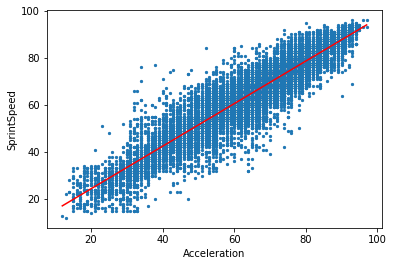

In [28]:
x_val = np.linspace(np.min(x),np.max(x))
plt.scatter(x,Y, s = 5)
plt.plot(x_val, m*x_val+b, c = 'r')
plt.xlabel(xcol)
plt.ylabel(ycol)

# Fifa Data Set - Age vs Potential

Next I will compare Age and Potential. Each fifa player has an Overall rating out of 100 and Potential is the Overall rating that each player has the ability to grow to. I would expect that as players get older, their increase in potential will decrease. Lets take a look.

In [47]:
xcol = 'Age'
ycol = 'Potential'
x = df[xcol]
Y = df[ycol] - df.Overall
model.fit(x,Y)
m = model.slope_Best()
b = model.b_Best()
print('The best fit line is: ', m,'x +',b)

The best fit line is:  -1.0020893015759234 x + 30.243293598112118


Text(0, 0.5, 'Change in Potential')

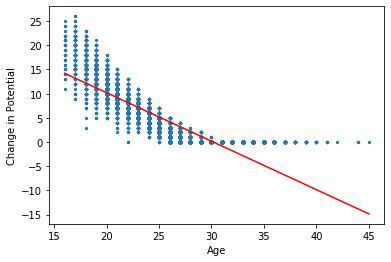

In [50]:
x_val = np.linspace(np.min(x),np.max(x))
plt.scatter(x,Y, s = 5)
plt.plot(x_val, m*x_val+b, c = 'r')
plt.xlabel(xcol)
plt.ylabel('Change in Potential')

This is pretty interesting as it seems like an exponential function would fit this relationship better. It makes sense because generally as age increases the change in potential will decrease. But at a certain age (in this case around 30), all players have 0 change in potential creating a curved shape. Finding a way to fit relationships to an expoential function seems like an interesting project but I will have to save that project for another day.

# The Math Behind the Linear Regression Model

Figuring out the math behind creating a best fit was the bulk of creating this model. I created the algorithm myself soley with the knowledge:

- A best fit line minimizes the summation of squared error
- A best fit line always crosses through the average point of a dataset

<br>

When I heard minimizing I thought about using calculus to find the best fit line. Eventually a plan vaguley formed in my mind:

1. Figure out the general equation for the summation of squared error based on each slope $m$. This will be $SS$
2. Derive that equation with respect to $m$. This willl be $SS'$
3. Set $SS' = 0$ and solve for $m$

<br>

Visually, our current relationship between SprintSpeed and Acceleration, looks like:


Text(0, 0.5, 'Summation of Squared Error')

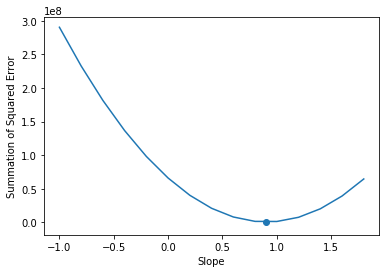

In [42]:
mrange = np.arange(-1, 2, .2)
all_SS = []
for i in mrange:
    all_SS.append(func.SS(x,Y,i,b))

plt.plot(mrange,all_SS)
plt.scatter(m, func.SS(x,Y,m,b))
plt.xlabel('Slope')
plt.ylabel('Summation of Squared Error')

# Step 1: Find the Summation of Squared Error Function
Generally speaking this function will be taking each point and finding the distance squared between it and the line with a slope of $m$. Then you sum of every one of these distances squared. Say you have point $p_i$ with the x cord of $x_i$ and y cord of $y_i$. Then $m$ is any arbitrary slope and $b$ is any arbitrary y intercept.

To find the squared error of $p_i$:

$SS_1 = (y_1 - (mx_1 + b))^2$

$SS_2 = (y_2 - (mx_2 + b))^2$

$SS_3 = (y_3 - (mx_3 + b))^2$

To find the Summation of squared error, you add all of these equations up. This results in:

$\sum_{i=1}^{n} (y_i - (mx_i + b))^2$

Now its worth here to mention how to deal with $b$. Since we know that our best fit line with cross the average point we can find $b$ in terms of $m$. Let the average x value be $a_x$ and the average y value be $a_y$. Plugging $a_x$ and $a_x$ into $y = mx + b$ results in:

$b = a_y - m*a_x$

So we get:

$\sum_{i=0}^{n} (y_i - (mx_i + a_y - ma_x))^2$

$\sum_{i=0}^{n} (y_i - mx_i - a_y + ma_x)^2$

$\sum_{i=0}^{n} (y_i^2 - 2mx_iy_i - 2a_yy_i + 2ma_xy_i + 2ma_yx_i - 2m^2a_xx_i + a_y^2 - 2ma_xa_y + m^2a_x^2 +m^2x_i^2)$

Next, the summation is applied:

$SS = \sum_{i=0}^{n} y_i^2 - 2m(\sum_{i=0}^{n} x_iy_i) - 2a_y(\sum_{i=0}^{n}y_i) +2ma_x(\sum_{i=0}^{n}y_i) + 2ma_x(\sum_{i=0}^{n}x_i) - 2m^2a_x(\sum_{i=0}^{n} x_i) +na_y^2 - 2nma_xa_y + nm^2a_x^2 +m^2(\sum_{i=0}^{n}x^2)$

And yes, I know it is painful to look at this equation but it does its job of calculating the sum of squared error with respect to $m$. 

# Step 2: Find the Derivitive of $SS$
This step is relatively simple:
$SS = \sum_{i=0}^{n} y_i^2 - 2m(\sum_{i=0}^{n} x_iy_i) - 2a_y(\sum_{i=0}^{n}y_i) +2ma_x(\sum_{i=0}^{n}y_i) + 2ma_x(\sum_{i=0}^{n}x_i) - 2m^2a_x(\sum_{i=0}^{n} x_i) +na_y^2 - 2nma_xa_y + nm^2a_x^2 +m^2(\sum_{i=0}^{n}x^2)$

$SS' = -2(\sum_{i=0}^{n}x_i) + 2a_x(\sum_{i=0}^{n}y_i) + 2a_y(\sum_{i=0}^{n}x_i) - 4ma_x(\sum_{i=0}^{n}x_i - 2na_xa_y) + 2nma_x^2 +2m(\sum_{i=0}^{n}x_i^2)$


# Step 3: Set to 0 and Solve for $m$
Then we have:

$0 = -2(\sum_{i=0}^{n}x_i) + 2a_x(\sum_{i=0}^{n}y_i) + 2a_y(\sum_{i=0}^{n}x_i) - 4ma_x(\sum_{i=0}^{n}x_i) - 2na_xa_y + 2nma_x^2 +2m(\sum_{i=0}^{n}x_i^2)$

$ - 2(\sum_{i=0}^{n}x_i) + 2a_x(\sum_{i=0}^{n}y_i) + 2a_y(\sum_{i=0}^{n}x_i) - 2na_xa_y =  4ma_x(\sum_{i=0}^{n}x_i) - 2nma_x^2 - 2m(\sum_{i=0}^{n}x_i^2)$

$ - 2(\sum_{i=0}^{n}x_i) + 2a_x(\sum_{i=0}^{n}y_i) + 2a_y(\sum_{i=0}^{n}x_i) - 2na_xa_y =  m(4a_x(\sum_{i=0}^{n}x_i) - 2na_x^2 - 2(\sum_{i=0}^{n}x_i^2))$


$m =  - \frac{2(\sum_{i=0}^{n}x_i) + 2a_x(\sum_{i=0}^{n}y_i) + 2a_y(\sum_{i=0}^{n}x_i) - 2na_xa_y}{(4a_x(\sum_{i=0}^{n}x_i) - 2na_x^2 - 2(\sum_{i=0}^{n}x_i^2))}$

This is the $m$ that will be used for the model. To find $b$:

$b = a_y - ma_x$

### Note
I'm aware that this algorithm is complex, confusing, and inefficient. There are others out there that are a lot simpler to understand and can more quickly compute best fit lines. The whole goal of this project was to test my math and programming skills to create my own linear regression model. I could have simply looked up more simpler and efficent best fit algorithms but I wanted to do it myself and I must admit it was super fun to figure all this out. Thanks for reading!